# Fourier transform and Fourier Inversion

Let $f: {\mathbb Z}_N \to {\mathbb R}$, where ${\mathbb Z}_N$ denotes integers modulo $N$.

Define the Fourier transform of $f$ by the formula

$$ \widehat{f}(m)=\frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} e^{-\frac{2 \pi i xm}{N}} f(x).$$

The Fourier Inversion Formula says that

$$ f(x)=\frac{1}{\sqrt{N}} \sum_{m=0}^{N-1} e^{\frac{2 \pi i xm}{N}} \widehat{f}(m),$$ which allows us to express every function on ${\mathbb Z}_N$ as a linear combination of "waves".

# Python code for the Fourier transform and Fourier Inversion

We are now going to consider a few examples to get a feel for how the Fourier transform works. First, we need to code the Fourier transform and its inverse using the built-in Python library.

In [2]:
import numpy as np

def compute_fourier_transform(f):
    """
    Compute the Fourier transform of the function f using NumPy's built-in FFT.
    """
    return np.fft.fft(f) / np.sqrt(len(f))

def inverse_fourier_transform(f_fft):
    """
    Compute the inverse Fourier transform of the function \widehat{f}.
    """
    return np.fft.ifft(f_fft) * np.sqrt(len(f_fft))

# A simple example

Let us consider the function $f(x)=1$ for all $x \in {\mathbb Z}_N$ and its plot.

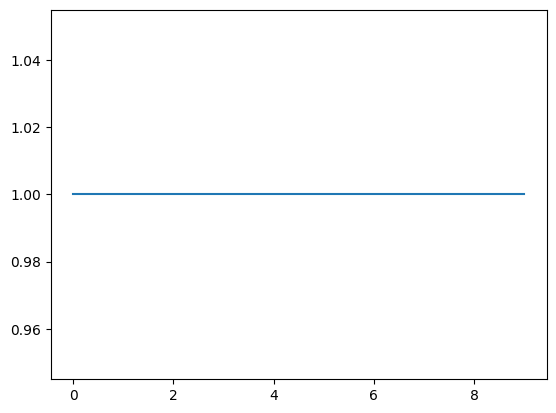

In [3]:
import matplotlib.pyplot as plt

N = 10

X = [1 for x in range(N)] # Creates a list of 1's of length N

plt.plot(X) # Creates a plot of values of the set X

# The Fourier transform of $f(x)=1$

Let us now graph the Fourier transform of the function $f(x)=1$ for all $x \in {\mathbb Z}_N$ described above.

c:\Users\olegs\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\olegs\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


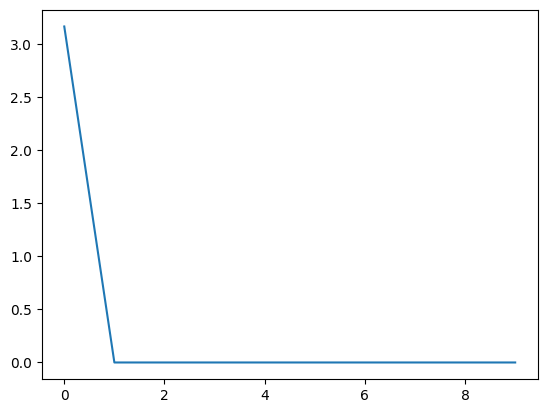

In [4]:
F = compute_fourier_transform(X) # Computes the Fourier transform of X

plt.plot(F) # Plots F

# A derivation of the Fourier transform of $f(x)=1$

Interpreting Python plots is not always straightforward. Let's compute the Fourier transform of the function $f(x) \equiv 1$ exactly and see it matches the graph above.

We have

$$ \widehat{f}(m)=\frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} e^{-\frac{2 \pi i xm}{N}} 1.$$

It follows that
$$\widehat{f(0)}=\frac{N}{\sqrt{N}}=\sqrt{N}.$$

If $m \not=0$, let

$$ z= e^{-\frac{2 \pi i m}{N}}.$$

In this language,

$$ \widehat{f}(m)=\frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} z^x.$$

Observe that if we set

$$ A = 1+z+z^2+\dots+z^{N-1}, $$ then

$$ zA = z+z^2+\dots+z^{N-1}+z^N.$$

Subtracting the second line from the first, we see that

$$ (1-z)A = 1-z^N=1-1=0.$$

Since $z \not=1$, we conclude that $A =0$.

We have just shown that if $f(x)=1$ for all $x \in {\mathbb Z}_N$, then

$$ \widehat{f}(0)=\sqrt{N},$$ and

$$ \widehat{f}(m)=0 \ \text{for all} \ m \not=0.$$

This is exactly what the plot above indicates.



# A more complicated but still regular function

Let us now consider "nice" function $f(x)=sin(x)$.

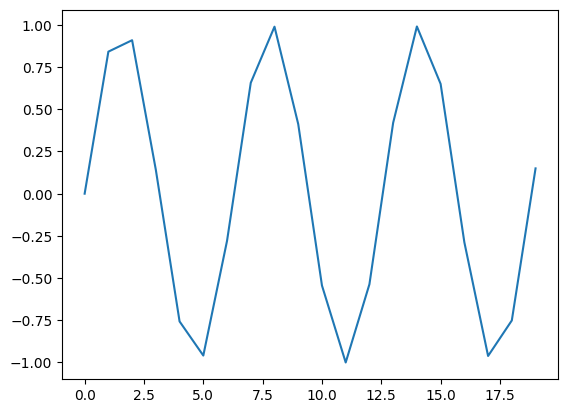

In [5]:
N = 20

X = [np.sin(x) for x in range(N)]

plt.plot(X)

# The Fourier transform of $f(x)=sin(x)$

Let us now plot the Fourier transform of $f(x)=sin(x)$ on ${\mathbb Z}_N$.

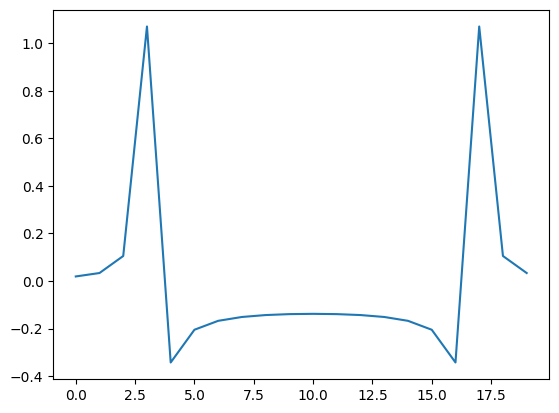

In [6]:
F = compute_fourier_transform(X)

plt.plot(F)

Note that with the exception of two spikes, most of the Fourier coefficients are quite small.

# The constant function with a spike

Now let's consider the function $f(x)=1$ for $x \not=5$, with $f(5)=100$.

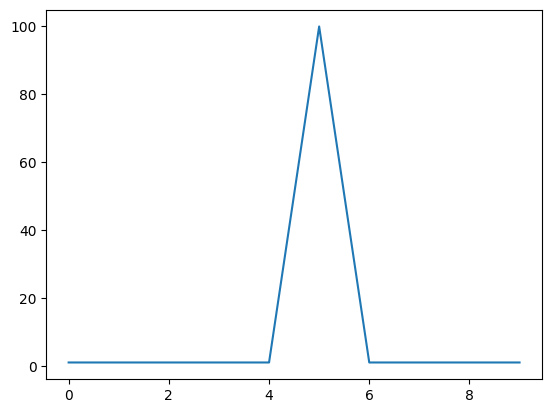

In [7]:
X = [1,1,1,1,1,100,1,1,1,1]

plt.plot(X)

# The Fourier transform of $f(x)=sin(x)$

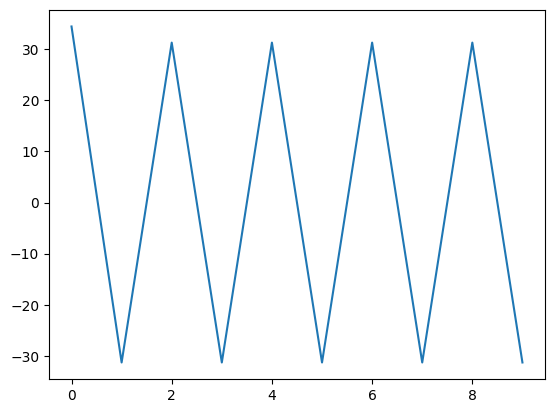

In [8]:
F = compute_fourier_transform(X)

plt.plot(F)

As you can see, the Fourier coefficients are spiking all over the place. Beyond the mathematical curiosity, the simple phenomenon you are observing has important practical ramifications. It is easy to accurately "forecast" future values of the function $f(x)$, or impute any of its missing values. The function $f(x)=1$ for all $x$ except $x=5$ where $f(5)=100$ is a completely different story. If you happen to need to impute the missing value at $x=5$, you are likely to be dead wrong.

From what we have seen, it seems reasonable to suppose that the sise of the Fourier coefficients plays an important role in our ability to impute or forecast a given function (sometimes called a time series).

# StemForAll2025 Time Series Imputation Project

One of the projects we are going to run during StemForAll2025 is time series imputation. The problem can be described as follows. Suppose that $f: {\mathbb Z}_N \to {\mathbb C}$, and the values
$ \{f(x): x \in M\}$ are missing, where $M \subset {\mathbb Z}_N$.

The basic question we ask is, under what reasonable assumptions can we reconstruct the missing values with high accuracy?

Another question is, how do we actually go about reconstructing those values in an efficient manner using Python?

# An informal description of basic theory

A theorem by Donoho and Stark (1989) based on a beautiful idea due to Benjamin Franklin Logan says (in this context) that if $f: {\mathbb Z}_N \to {\mathbb C}$ with the values $\{f(x): x \in M\}$ missing,
$ S= \{m \in {\mathbb Z}_N: \widehat{f}(m) \not=0\}$ and
$ |M| \cdot |S|<\frac{N}{2},$ then all the values of $f$ can be recovered exactly. Moreover, the recovery can be accomplished as follows:

$ arg min_u \left|\sum_{m=0}^{N-1} |\widehat{u}(m)| \right| \ \text{subject to the constraint} \ f(x)=u(x) \ \text{for} \ x \notin M.$

Using a result of Candes, Romberg and Tao (2008), if $M$ is random, one can handle sets $M$ of size roughly
$ \frac{N}{\log(N)},$ provided that roughly half of the Fourier coefficients are $0$.

As you might imagine, the latter condition is almost never satisfied exactly in real life.  



# Building an imputation Python function

We are going to build an imputation function based on the idea described above and test in a several different data sets.

# Installations

In [9]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


# Imports

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import random
import time
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import statistics
from scipy.signal import medfilt
import time
import concurrent.futures
from sklearn.linear_model import Ridge

# Utility functions

In [11]:
def compute_fourier_transform(f):
    """
    Compute the Fourier transform of the function f using NumPy's built-in FFT.
    """
    return np.fft.fft(f) / np.sqrt(len(f))

def inverse_fourier_transform(f_fft):
    """
    Compute the inverse Fourier transform of the function \widehat{f}.
    """
    return np.fft.ifft(f_fft) * np.sqrt(len(f_fft))


def find_slots(input_list, value):
    # Use a list comprehension to find the indices where the value occurs
    return [i for i, x in enumerate(input_list) if x == value]

def moduli(complex_list):
    # Use list comprehension to compute the modulus of each complex number
    return [abs(z) for z in complex_list]


def pc(x, y):
    if len(x) != len(y):
        raise ValueError("Both lists must have the same length")

    n = len(x)
    mean_x = sum(x) / n
    mean_y = sum(y) / n

    numerator = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))
    denominator = math.sqrt(sum((x[i] - mean_x) ** 2 for i in range(n)) * sum((y[i] - mean_y) ** 2 for i in range(n)))

    if denominator == 0:
        return 0  # If the denominator is 0, return 0 (no correlation)

    return numerator / denominator

def rl(L, M):
    return [L[x] for x in M]

def compute_norm_complement(f, M):
    """
    Computes the norm of f over the complement of M (M^c).

    Parameters:
        f (list of float): A list of real numbers representing f: Z_N -> R.
        M (set of int): A set of indices corresponding to missing values.

    Returns:
        float: The computed norm.
    """
    N = len(f)
    # Ensure indices in M are valid
    if any(index < 0 or index >= N for index in M):
        raise ValueError("Indices in M must be within the range of f.")

    # Compute the complement of M
    M_complement = {x for x in range(N)} - M

    # Compute the sum of squared values over M^c
    sum_squared = sum(f[x]**2 for x in M_complement)

    # Return the square root of the sum
    return math.sqrt(sum_squared)

def STD(L):
    return statistics.stdev(L)

# Datasets

In [12]:
df1 = pd.read_csv('NumericalTests/RawData/Delhi Daily Climate.csv')

df2 = pd.read_csv('NumericalTests/RawData/Electric Production.csv')

df3 = pd.read_csv('NumericalTests/RawData/Australia Monthly Beer Production.csv')

df4 = pd.read_csv('NumericalTests/RawData/Peyton Manning Wikipedia Visits.csv')

du1 = pd.read_csv('NumericalTests/RawData/OU Function, Theta=0.6, Sigma=0.1.csv')

du2 = pd.read_csv('NumericalTests/RawData/OU Function, Theta=0.6, Sigma=0.3.csv')

du3 = pd.read_csv('NumericalTests/RawData/OU Function, Theta=0.8, Sigma=0.1.csv')

du4 = pd.read_csv('NumericalTests/RawData/OU Function, Theta=0.8, Sigma=0.3.csv')

l1 = list(df1['y'])
l2 = list(df2['y'])
l3 = list(df3['y'])
l4 = list(df4['y'])
d1 = list(du1['y'])
d2 = list(du2['y'])
d3 = list(du3['y'])
d4 = list(du4['y'])

# The $L^1$-minimizer

${\bf Suggested \ mini-project:}$ The mathematics behind the code below is described above. Please go over it carefully. In addition, please note that the code below contains two different measures of accuracy. Please write out the mathematical formulation of these measures of accuracy and try to understand the logic behind them. How are the two measures of accuracy different? In which situations do they yield very different results?

In [13]:
import numpy as np
import cvxpy as cp

def L1optimizer(input_list, M):
    """
    Optimize a function g to minimize the sum of absolute values of its Fourier coefficients
    while ensuring g(x) equals f(x) for indices x not in the subset M.
    """
    N = len(input_list)  # Length of the input list

    # Ensure M is a subset of {0, 1, ..., N-1}
    if not M.issubset(set(range(N))):
        raise ValueError("M must be a subset of indices in the range of the input list.")

    # Convert input list to a NumPy array
    f = np.array(input_list, dtype=float)

    # Optimization variables
    g = cp.Variable(N, value=f)  # Initialize with the input list f

    # Create a mask for the indices that are not in M
    mask = np.ones(N, dtype=bool)
    mask[list(M)] = False  # Set the indices in M to False (which will be excluded from the constraint)

    # Constraints: g(x) = f(x) for indices not in M
    constraints = [g[mask] == f[mask]]

    # Fourier matrix for the Discrete Fourier Transform
    x = np.arange(N)
    m = np.arange(N)
    exponents = np.outer(x, m)  # Outer product for exponents
    temp = -2j * np.pi
    F = np.exp(temp * exponents / N) / np.sqrt(N)

    # Compute the Fourier transform of g(x) using the Fourier matrix (CVXPY compatible)
    g_fft = F @ g  # Use matrix multiplication for Fourier transform

    # Objective: Minimize sum of the absolute values of the Fourier coefficients (L1 norm)
    objective = cp.Minimize(cp.sum(cp.abs(g_fft)))

    # Problem definition
    problem = cp.Problem(objective, constraints)

    try:
        # Solve the problem using the SCS solver
        problem.solve(solver=cp.SCS, verbose=False)

        if problem.status != cp.OPTIMAL:
            raise ValueError("Optimization failed to find a solution.")

    except Exception as e:
        print(f"Error occurred: {e}")
        return None, None, None  # Handle failure appropriately

    # Extract the optimized g(x)
    g_result = g.value

    if g_result is None:
        print("Optimization did not return a valid result.")
        return None, None, None

    # Compute error measurements
    f_M = f[list(M)]
    g_M = g_result[list(M)]

    # Compute μ
    mu = np.mean(np.abs(f_M)) if len(M) > 0 else 0

    # Compute the numerator for RMSE-based error
    numerator = np.sqrt(np.sum((f_M - g_M) ** 2) / N)

    # Compute the denominator for RMSE-based error
    denominator = np.sqrt(np.sum((f_M - mu) ** 2) / N)

    # Final RMSE-based error metric
    final_error = numerator / denominator if denominator != 0 else float('inf')

    # Compute the original relative absolute error
    abs_numerator = np.sum(np.abs(f_M - g_M))
    abs_denominator = np.sum(np.abs(f_M))
    abs_error = abs_numerator / abs_denominator if abs_denominator != 0 else float('inf')

    return g_result.tolist(), abs_error, final_error

# Trigonometric polynomial regression imputation code

${\bf Suggested \ mini-project:}$ Figure out the mathematics behind the code below and read up on ridge regression.

In [14]:
import numpy as np
from sklearn.linear_model import Ridge

def trig_imputer_ridge(input_list, M, n, alpha=1.0):
    """
    Approximate the given function using a trigonometric polynomial and impute missing values using ridge regression.

    Parameters:
        input_list (list): The observed function values.
        M (set): Indices where the values are missing.
        n (int): Degree of the trigonometric polynomial.
        alpha (float): Regularization parameter for ridge regression.

    Returns:
        g_result (list): The approximated function over all indices.
        abs_error (float): Relative absolute error on the missing indices.
        final_error (float): Normalized RMSE-based error on the missing indices.
    """
    N = len(input_list)

    # Validate indices
    if not M.issubset(range(N)):
        raise ValueError("M must be a subset of indices in the input list.")

    f = np.array(input_list, dtype=float)

    # Create the set of observed data indices (not in M)
    not_M = np.array(sorted(set(range(N)) - M))

    if not_M.size == 0:
        raise ValueError("There must be some observed data (not all indices are missing).")

    # --- Build the design matrix for observed data ---
    angles = 2 * np.pi * np.outer(not_M, np.arange(n + 1)) / N
    X_cos = np.cos(angles)  # Cosine part for all degrees (j = 0, 1, ..., n)

    if n >= 1:
        X_sin = np.sin(angles[:, 1:])  # Sine part for j > 0
        X = np.hstack([X_cos, X_sin])  # Combine cosine and sine parts
    else:
        X = X_cos

    # Observed outputs
    y = f[not_M]

    # --- Fit ridge regression ---
    ridge = Ridge(alpha=alpha, fit_intercept=False)
    ridge.fit(X, y)
    coeffs = ridge.coef_

    # --- Reconstruct the full approximated function ---
    angles_all = 2 * np.pi * np.outer(np.arange(N), np.arange(n + 1)) / N
    X_all_cos = np.cos(angles_all)

    if n >= 1:
        X_all_sin = np.sin(angles_all[:, 1:])
        X_all = np.hstack([X_all_cos, X_all_sin])
    else:
        X_all = X_all_cos

    # Compute the reconstructed signal
    g_result = X_all @ coeffs

    # --- Compute error metrics ---
    M_sorted = np.array(sorted(M))

    if M_sorted.size > 0:
        f_M = f[M_sorted]
        g_M = g_result[M_sorted]

        # Compute μ
        mu = np.mean(np.abs(f_M)) if len(M) > 0 else 0

        # Compute the numerator for RMSE-based error
        numerator = np.sqrt(np.sum((f_M - g_M) ** 2) / N)

        # Compute the denominator for RMSE-based error
        denominator = np.sqrt(np.sum((f_M - mu) ** 2) / N)

        # Final RMSE-based error metric
        final_error = numerator / denominator if denominator != 0 else float('inf')

        # Compute the original relative absolute error
        abs_numerator = np.sum(np.abs(f_M - g_M))
        abs_denominator = np.sum(np.abs(f_M))
        abs_error = abs_numerator / abs_denominator if abs_denominator > 1e-10 else float('inf')

    else:
        abs_error = 0.0
        final_error = 0.0

    return g_result.tolist(), abs_error, final_error


# Testing ground

In [15]:
num_run = 50
a1, a2 = 0, 0
T = l1[100:550]
M=set(sorted([random.randint(1, 449) for _ in range(125)]))

# Function to run the optimization methods and return the results
def run_optimization(count, T, M):

    # Run L1optimizer
    result_a1 = L1optimizer(T, M)

    # Run trig_imputer_ridge
    result_a2 = trig_imputer_ridge(T, M, 3)

    # Return the results
    return (result_a1[1], result_a2[1])

# Start the total timer before the loop
start_time = time.time()

# Initialize the final results
results = []

# Use ProcessPoolExecutor or ThreadPoolExecutor for parallelism
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Generate random M for each run and execute each task in parallel
    future_to_run = {executor.submit(run_optimization, count, T, set(sorted([random.randint(1, 449) for _ in range(148)]))): count for count in range(num_run)}

    # Wait for all the futures to complete
    for future in concurrent.futures.as_completed(future_to_run):
        try:
            result = future.result()  # Get the result of the task
            count = future_to_run[future]  # Retrieve the count corresponding to this future

            # Accumulate the results
            a1 += 100 * (1 - result[0])
            a2 += 100 * (1 - result[1])

        except Exception as e:
            print(f"Error in run {count + 1}: {e}")

# End the total timer after the loop
end_time = time.time()
elapsed_time = end_time - start_time

# Display the average results and the total time taken
print(f"Average Results: a1 = {a1 / num_run}, a2 = {a2 / num_run}")
print(f"Total time taken for {num_run} runs: {elapsed_time:.2f} seconds")

Average Results: a1 = 94.53159713669962, a2 = 93.32417596850219
Total time taken for 50 runs: 14.58 seconds


# Visualization

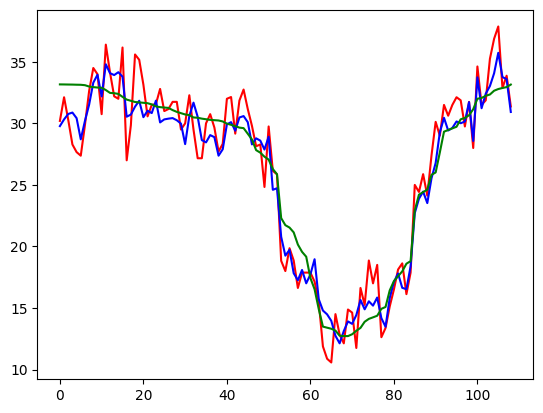

In [16]:
T = l1[100:550]
M=set(sorted([random.randint(1, 449) for _ in range(125)]))

plt.plot(rl(T,M), color = 'red'),
plt.plot(rl(L1optimizer(T, M)[0],M), color = 'blue')
plt.plot(rl(trig_imputer_ridge(T, M, 3)[0],M), color = 'green')

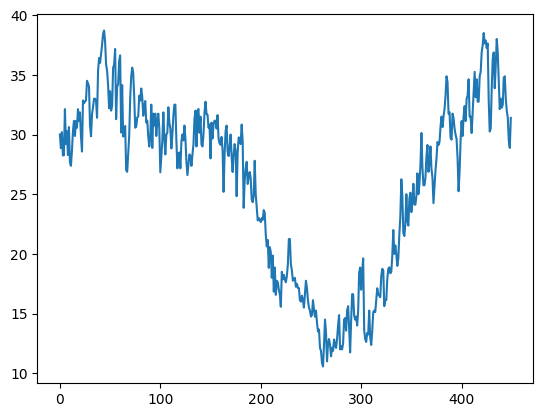

In [17]:
plt.plot(l1[100:550])

In [18]:
100*(1-L1optimizer(T, M)[2])

77.05929827235536

In [19]:
100*(1-trig_imputer_ridge(T, M, 3, alpha=1.0)[2])

68.66107441629488

In [ ]:
def IQR(df, col, threshold=1.5):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outlier_indices = df[~((df[col] >= lower_bound) & (df[col] <= upper_bound))].index
    return outlier_indices

def sigma_rule(df, col, threshold = 3):
    sigma = df[col].std()
    outlier_indices = set(
        df.index[(df[col] < -threshold * sigma) | (df[col] > threshold * sigma)]
    )

    return outlier_indices


def give_outlier_indexes_mad(df, col, threshold=3):
    median = df[col].median()
    mad = (df[col] - median).abs().median()
    lower_bound = median - threshold * mad
    upper_bound = median + threshold * mad
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_indices = df[outlier_mask].index.tolist()
    return outlier_indices

In [ ]:
def process_data_outliers(
    df, col, method="original", outlier_func=IQR ,threshold=1.5, window=12, l1_optimizer=None
):
    """
    1. "original" - returns raw data.
    2. "rolling_avg" - replaces anomalies with rolling average.
    3. "l1_minimizer" - replaces anomalies using an L1-minimization method.

    Parameters:
        df: input DataFrame
        col: column to process
        method: "original", "rolling_avg", "l1_minimizer"
        threshold: IQR multiplier for anomaly detection
        window: rolling average window size
        l1_optimizer: function for L1-minimization imputation

    Returns:
        processed DataFrame
    """

    if method == "original":
        return df.copy()

    outlier_indices = outlier_func(df, col, threshold)
    df_processed = df.copy()

    if method == "rolling_avg":
        rolling_avg = df[col].rolling(window=window, min_periods=1).mean()
        df_processed.loc[outlier_indices, col] = rolling_avg.loc[
            outlier_indices
        ].astype(df[col].dtype)

    elif method == "l1_minimizer":
        df_processed[col] = l1_optimizer(df[col].tolist(), set(outlier_indices))[0]

    return df_processed

In [29]:
df19 = pd.read_csv("USA GDP Growth 1961-2021.csv", decimal=";")
df19["GDP"] = df19["GDP"].replace({"\$|B": ""}, regex=True).astype(float)
df19["Year"] = df19["Year"].astype(int)
df19["Year"] = df19["Year"] - 1968
df19 = df19[::-1]
df19 = df19.dropna()

numbers, indices = df_filter(df19, "Growth")
print(numbers)
print(indices)

ValueError: invalid literal for int() with base 10: '$22'

In [24]:
info = L1optimizer(numbers, indices)

ValueError: M must be a subset of indices in the range of the input list.

In [ ]:
for i in info:
    print(i)

[1.4137382703635335e-08, -0.5034443211680298, -1.5432867246429715e-08, 5.8064454301351395e-08, 6.524813525041566e-08, -2.8387578171769567e-08, -1.442739823192222e-07, -2.184677354904928, 3.6445633948735326e-08, 9.408246243095086e-09, -3.140233073733643e-08, -1.3883627718168059e-07, -0.5349492126968894, 1.7132110392855302, -4.127798071179118e-08, -2.0368647874930045e-08, -6.343757814932727e-08, 9.5068800759219e-08, 4.832983745840272e-08, 5.167308055994481e-08, 1.0390501411153251e-07, 0.20540904827682285, -2.283541248358267e-08, -5.259695810711001e-08, 1.698389117954712e-08, 2.3774679103527583, 1.3415815525973895, 2.057497012882122, -2.8054072650765103, -1.8897358009237086, -7.385342839200726e-08, 1.8786846076502052e-08, 1.3161703288733318e-07, 1.6900667769408968e-07, 0.7522917235945145, -1.1434058696084232e-07, -3.81890646680458e-09, 2.819078908834112, 1.2400287276649689, -5.162295694760563e-08, 3.234923233911653e-08, -1.4160508686279311e-08, -1.0386050667080061e-07, -4.666440170454841e